In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from socket import *
serv = socket(AF_INET,SOCK_STREAM)



In [3]:
df = pd.read_csv('CustomerDataClean.csv',sep=",", encoding='Latin-1')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


###### Implementing DBSCAN

In [4]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [6]:
X = Normalizer().fit_transform(df)

X

col_list = list(df.columns)

df = pd.DataFrame(data=X, columns=col_list)

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.000000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.000000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.000020,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.000000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.000000,0.025661,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.000000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.000000,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884301,0.287924,0.043230,0.000442,0.005306
8946,0.013553,0.000707,0.211952,0.000000,0.211952,0.000000,0.000707,0.000000,0.000589,0.000000,0.000000,0.004239,0.706507,0.194898,0.610568,0.000000,0.004239
8947,0.022773,0.000811,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.000243,0.005840
8948,0.026524,0.001642,0.000000,0.000000,0.000000,0.072055,0.000000,0.000000,0.000000,0.000328,0.003942,0.000000,0.985466,0.103572,0.109891,0.000493,0.011826


In [7]:
min_samples = df.shape[1]*2
dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
clusters = dbscan.fit_predict(df)
print("clusters created: "+ str(list(set(clusters))))

clusters created: [0]


In [102]:
# identified no clusters from the value above

###### implementing DBSCAN with Elbow Method

In [103]:
# finding the best value of eps to use

In [8]:
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(df)
distance, indices = nbrs.kneighbors(df)

In [9]:
print("min samples: "+ str(min_samples))
print("shape of distance matrix: "+ str(distance.shape)+"\n")
for enum, row in enumerate(distance[:5]):
    print("observation "+ str(enum)+": "+ str([round(x,2) for x in row]))

min samples: 34
shape of distance matrix: (8950, 34)

observation 0: [0.0, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09]
observation 1: [0.0, 0.04, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13]
observation 2: [0.0, 0.02, 0.03, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
observation 3: [0.0, 0.04, 0.08, 0.09, 0.09, 0.09, 0.1, 0.11, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13, 0.13, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]
observation 4: [0.0, 0.07, 0.1, 0.1, 0.11, 0.11, 0.11, 0.14, 0.14, 0.14, 0.15

In [10]:
# the last cell represents the distance of the Kth farthest point
df['knn_farthest_dist'] = distance[:,-1]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,knn_farthest_dist
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546,0.086894
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101,0.133936
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495,0.082691
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496,0.151722
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400,0.198599


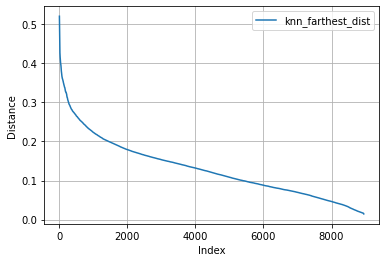

In [11]:
df.sort_values('knn_farthest_dist', ascending=False).reset_index()[['knn_farthest_dist']].plot()
plt.xlabel('Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [26]:
# km= DBSCAN(eps=0.28, min_samples=min_samples)
# df['cluster'] = km.fit_predict(df[col_list])

# df.cluster.value_counts()

In [12]:
km= DBSCAN(eps=0.2, min_samples=min_samples)
df['cluster'] = km.fit_predict(df[col_list])

df.cluster.value_counts()

 0    8307
-1     527
 1     116
Name: cluster, dtype: int64

In [20]:
# km= DBSCAN(eps=0.15, min_samples=min_samples)
# df['cluster'] = km.fit_predict(df[col_list])

# df.cluster.value_counts()

PRINCIPAL COMPONENT ANALYSIS

In [28]:
pca = PCA(n_components= 2)
principal_comp= pca.fit_transform(X)
principal_comp

array([[-0.31737384, -0.04891545],
       [ 0.32147936, -0.15030301],
       [-0.20679333, -0.18526159],
       ...,
       [-0.3885402 , -0.06594847],
       [-0.33084461, -0.18391082],
       [-0.09490054,  0.30519518]])

In [29]:
pca_df = pd.DataFrame(data=principal_comp, columns=['PCA1','PCA2'])

In [30]:
pca_df

# df_cluster_pca = pd.concat([pca_df, pd.DataFrame({'cluster':y_cluster_dbs})], axis=1)
df_cluster_pca = pd.concat([pca_df, df['cluster']], axis=1)

df_cluster_pca

,PCA1,PCA2,cluster
0,-0.317374,-0.048915,0
1,0.321479,-0.150303,0
2,-0.206793,-0.185262,0
3,-0.270623,-0.123003,0
4,0.140257,-0.088374,0
...,...,...,...
8945,-0.293421,0.162560,0
8946,-0.056720,0.100973,-1
8947,-0.388540,-0.065948,0
8948,-0.330845,-0.183911,0


In [31]:
df_cluster_pca.cluster.value_counts()

 0    8307
-1     527
 1     116
Name: cluster, dtype: int64

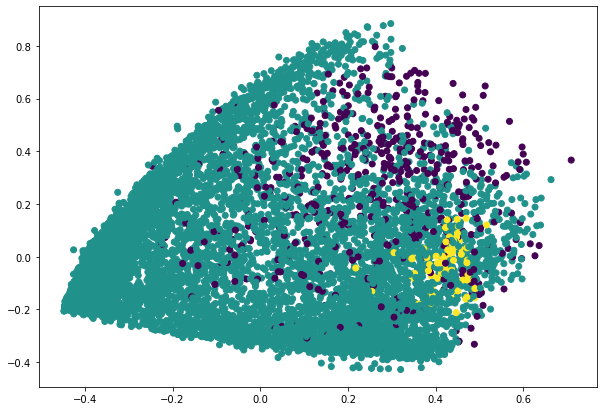

In [32]:
#Plot
plt.figure(figsize=(10,7))
plt.scatter(df_cluster_pca['PCA1'],df_cluster_pca['PCA2'],c=df_cluster_pca['cluster'])

# Silhoutte Test

In [13]:
dbscan = km
model = dbscan.fit(X)

labels = model.labels_
set(labels)

from sklearn import metrics


# identifing the core points
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True

#  calculating the number of clusters
n_clusters = len(set(labels))- (1 if -1 in labels else 0)
n_clusters


print(metrics.silhouette_score(X,labels))

0.21356690293838287
